In [53]:
require(cowplot)
require(data.table)
require(ggplot2)
require(ggforce)
require(outliers)
require(pbapply)
require(tiff)

Loading required package: ggforce



# 60x

In [8]:
nfdata = fread("../../data/60x_mask/nuclear_features.csv")
head(nfdata, 1)

sid,nid,size,dilated_size
<int>,<int>,<int>,<int>
1,1,2781,5992


In [11]:
p1 = ggplot(nfdata, aes(x=factor(1), y=size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels")

In [12]:
p2 = ggplot(nfdata, aes(x=factor(1), y=dilated_size)) + geom_violin(trim=T) + geom_boxplot(width=.1) +
    theme_bw() + labs(x="", y="Nuclear size in voxel", title="Watersheded labels after dilation (no overlap)")

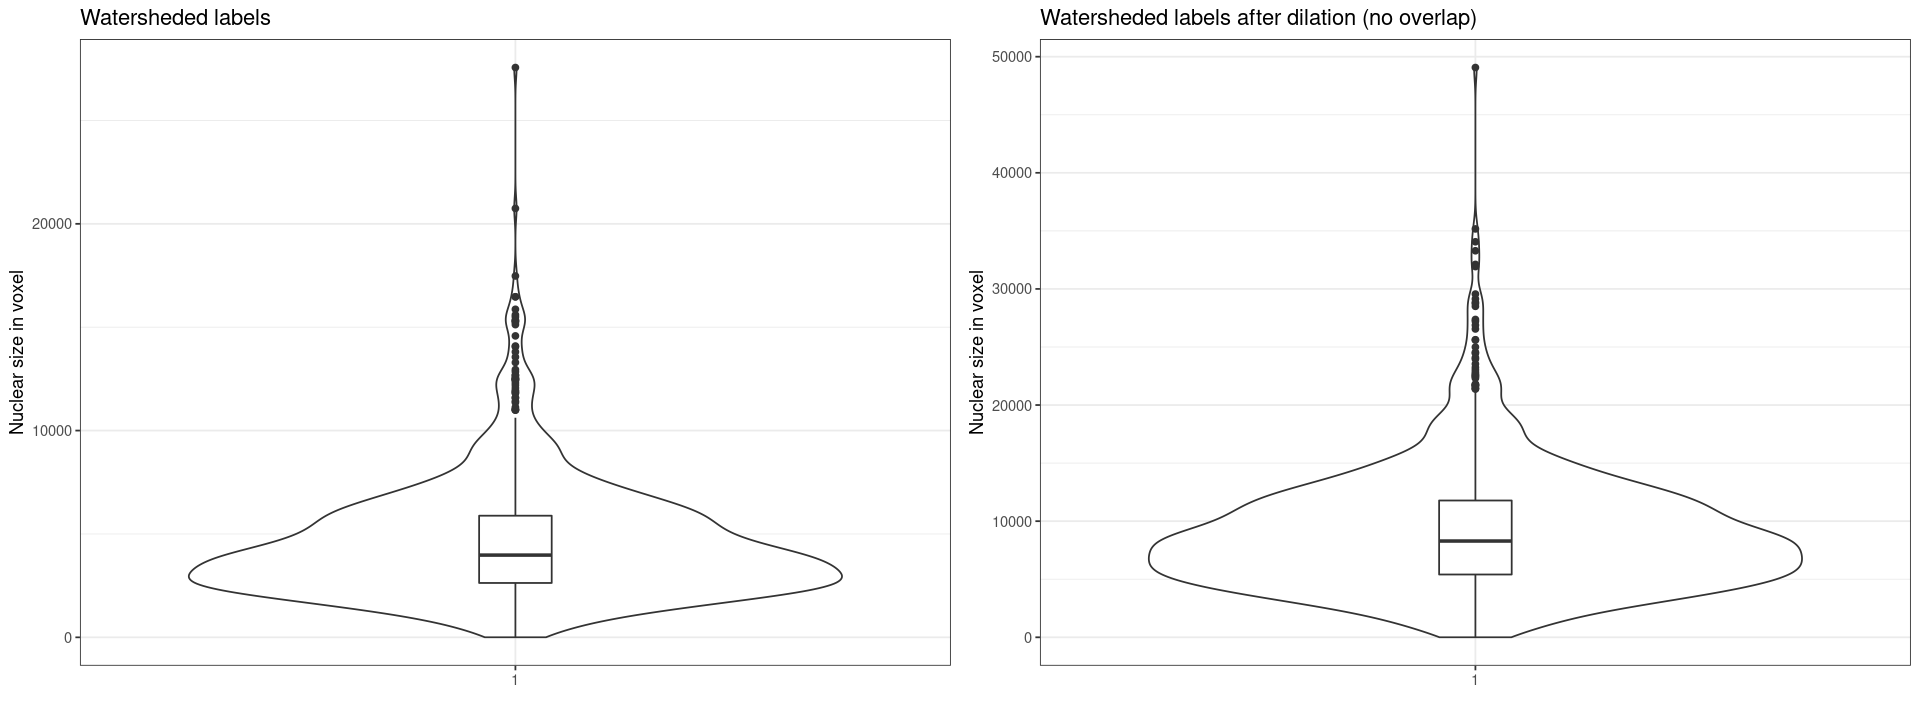

In [16]:
options(repr.plot.width=16, repr.plot.height=6)
plot_grid(p1, p2, nrow=1)

In [26]:
#nfdata[size>5e3, nid, by=sid]

In [47]:
#options(repr.plot.width=16, repr.plot.height=16)
#heatmap(tiff::readTIFF("../../data/60x_mask/labels/a647_001.labels.tiff"), Rowv=NA, Colv=NA, labRow=NA, labCol=NA)

In [48]:
#plot(tiff::readTIFF("../../data/60x_mask/labels/a647_001.labels.tiff", as.is=T))
summary(c(tiff::readTIFF("../../data/60x_mask/labels/a647_001.labels.tiff", as.is=T)))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     0.0     0.0    15.6     0.0   166.0 

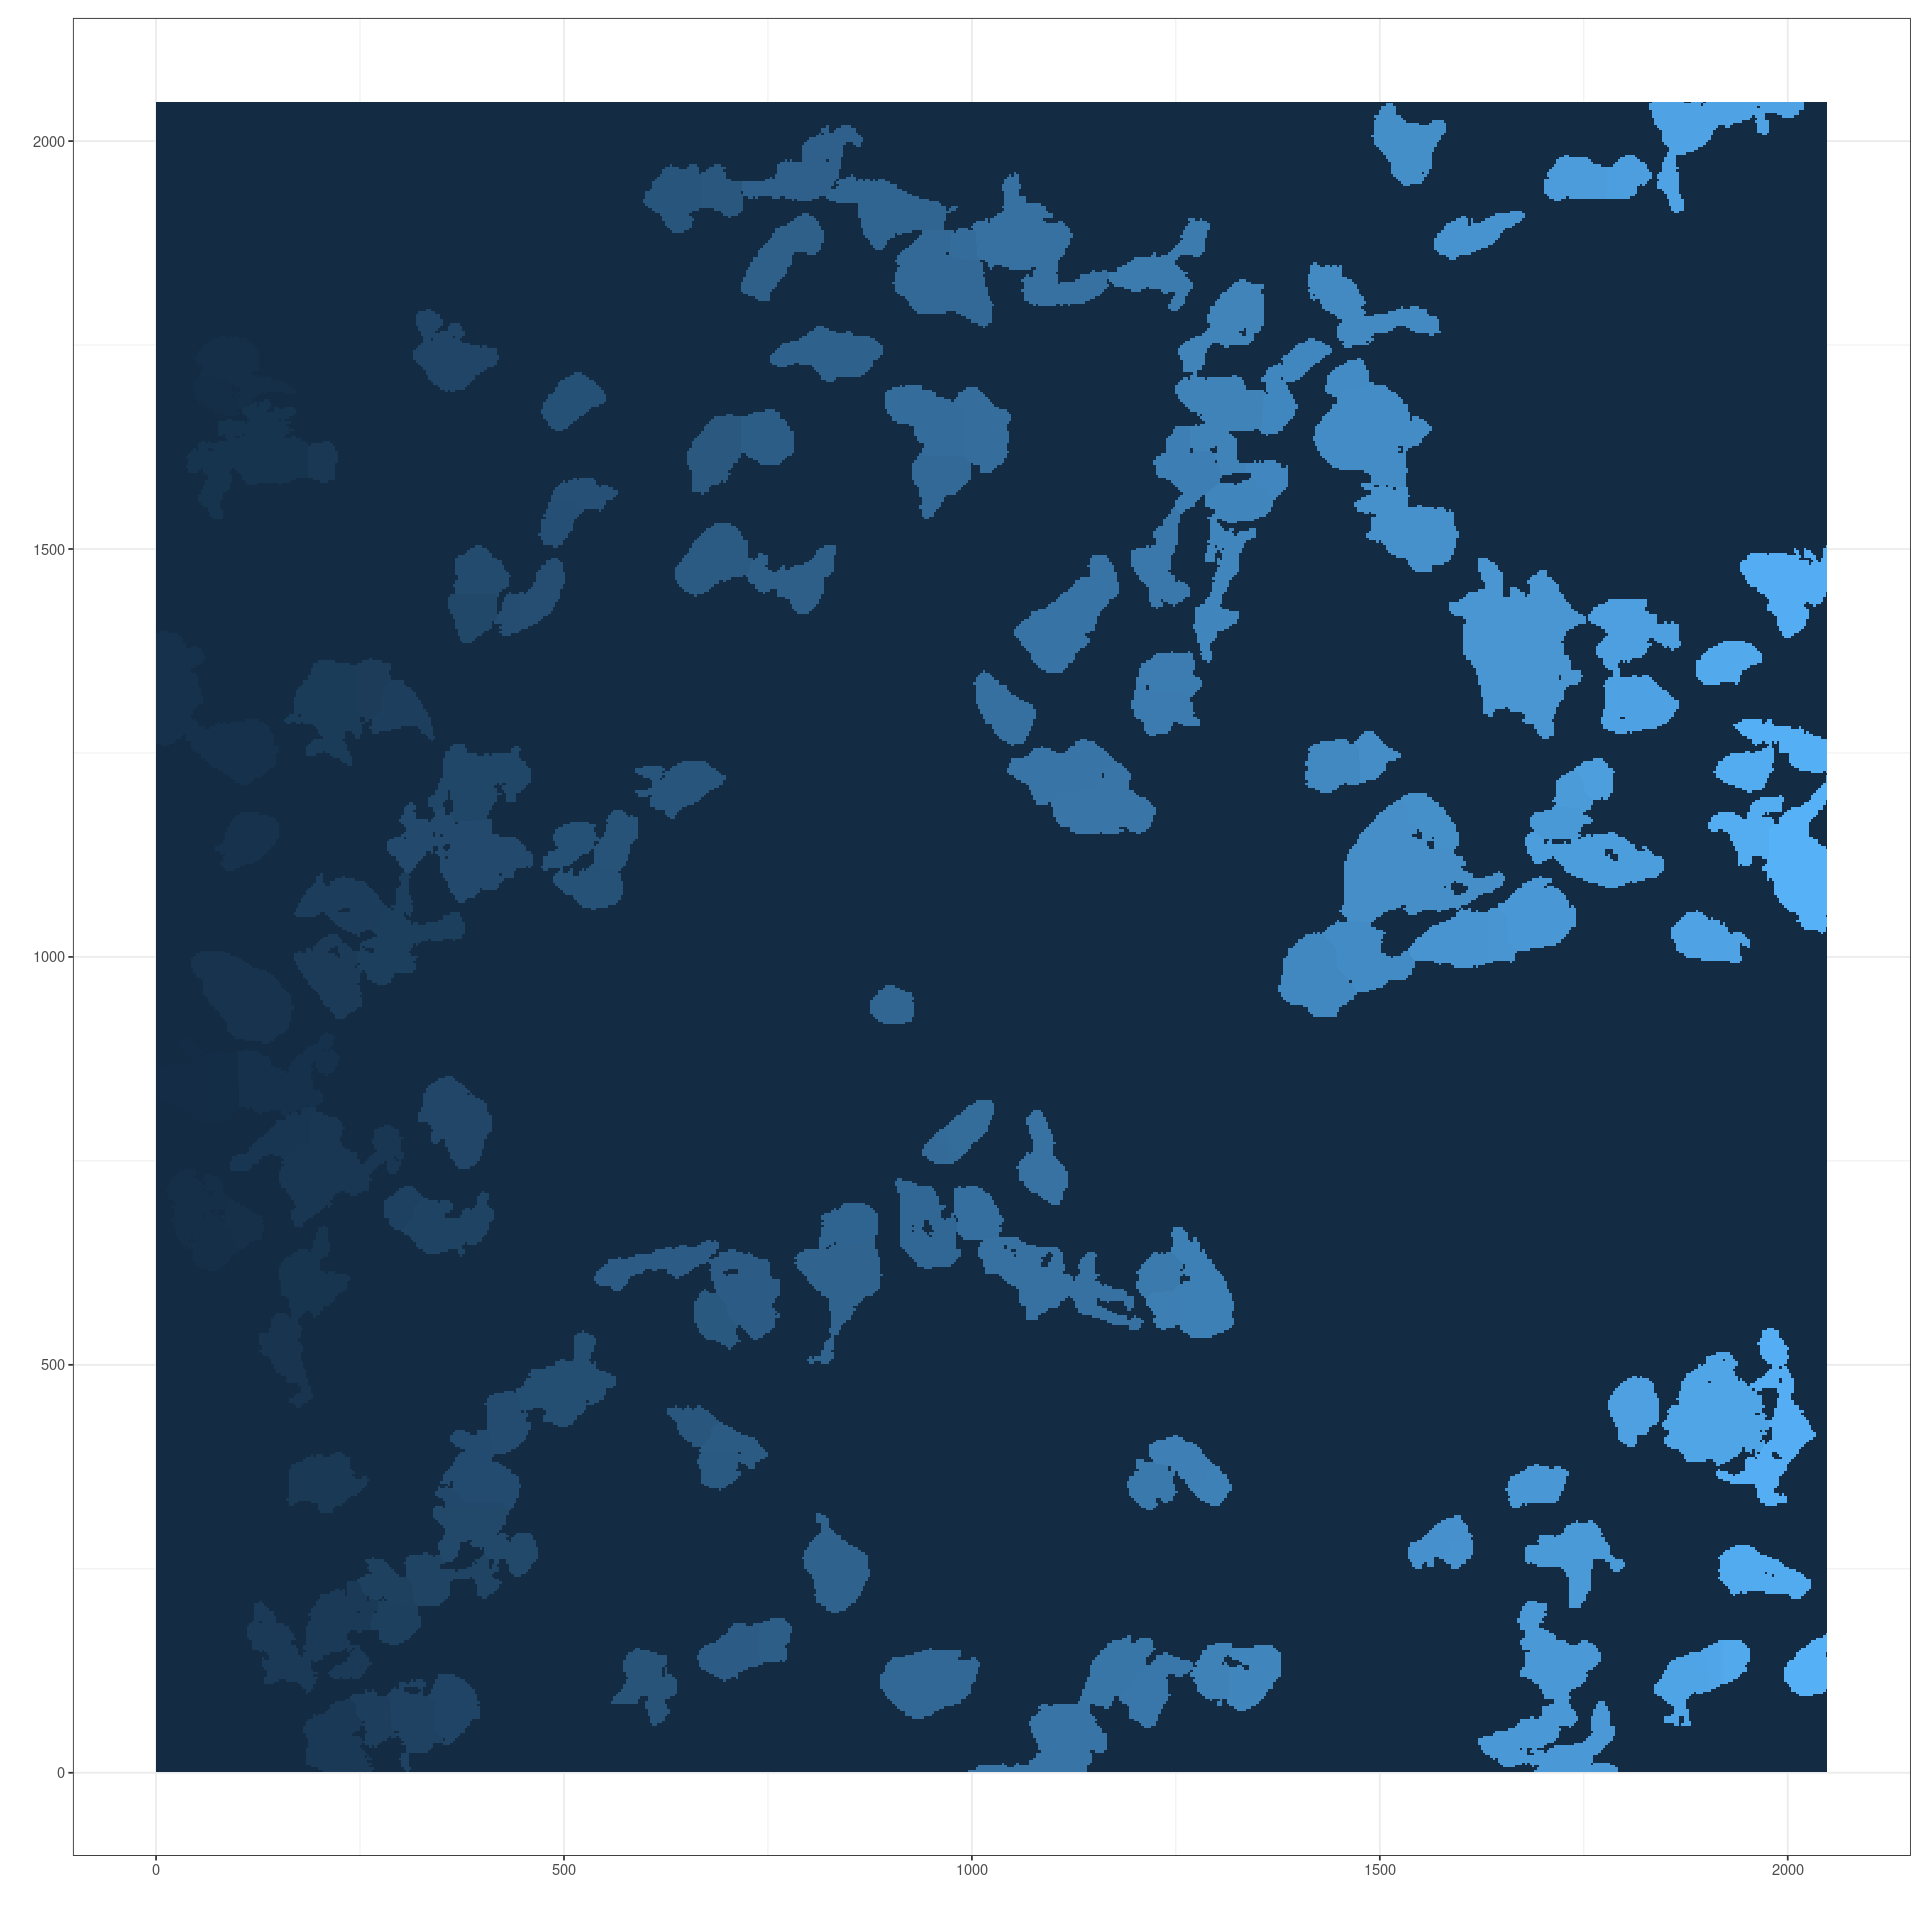

In [59]:
img2d = readTIFF("../../data/60x_mask/labels/a647_001.labels.tiff", as.is=T)

# Assemble into data.table format
col_idx = matrix(rep(1:2048, 2048), ncol=2048)
row_idx = t(col_idx)
# z_proj = rowSums(volumeAr, dim=2)  # sum proj.
volumedt = data.table(col=c(col_idx), row=c(row_idx), value=c(img2d))

# Plot with ggplot
ggplot() +
    geom_tile(data=volumedt, aes(x=col, y=row, fill=value)) +
    coord_fixed() + theme_bw() +
    guides(fill=F) + labs(x="", y="")

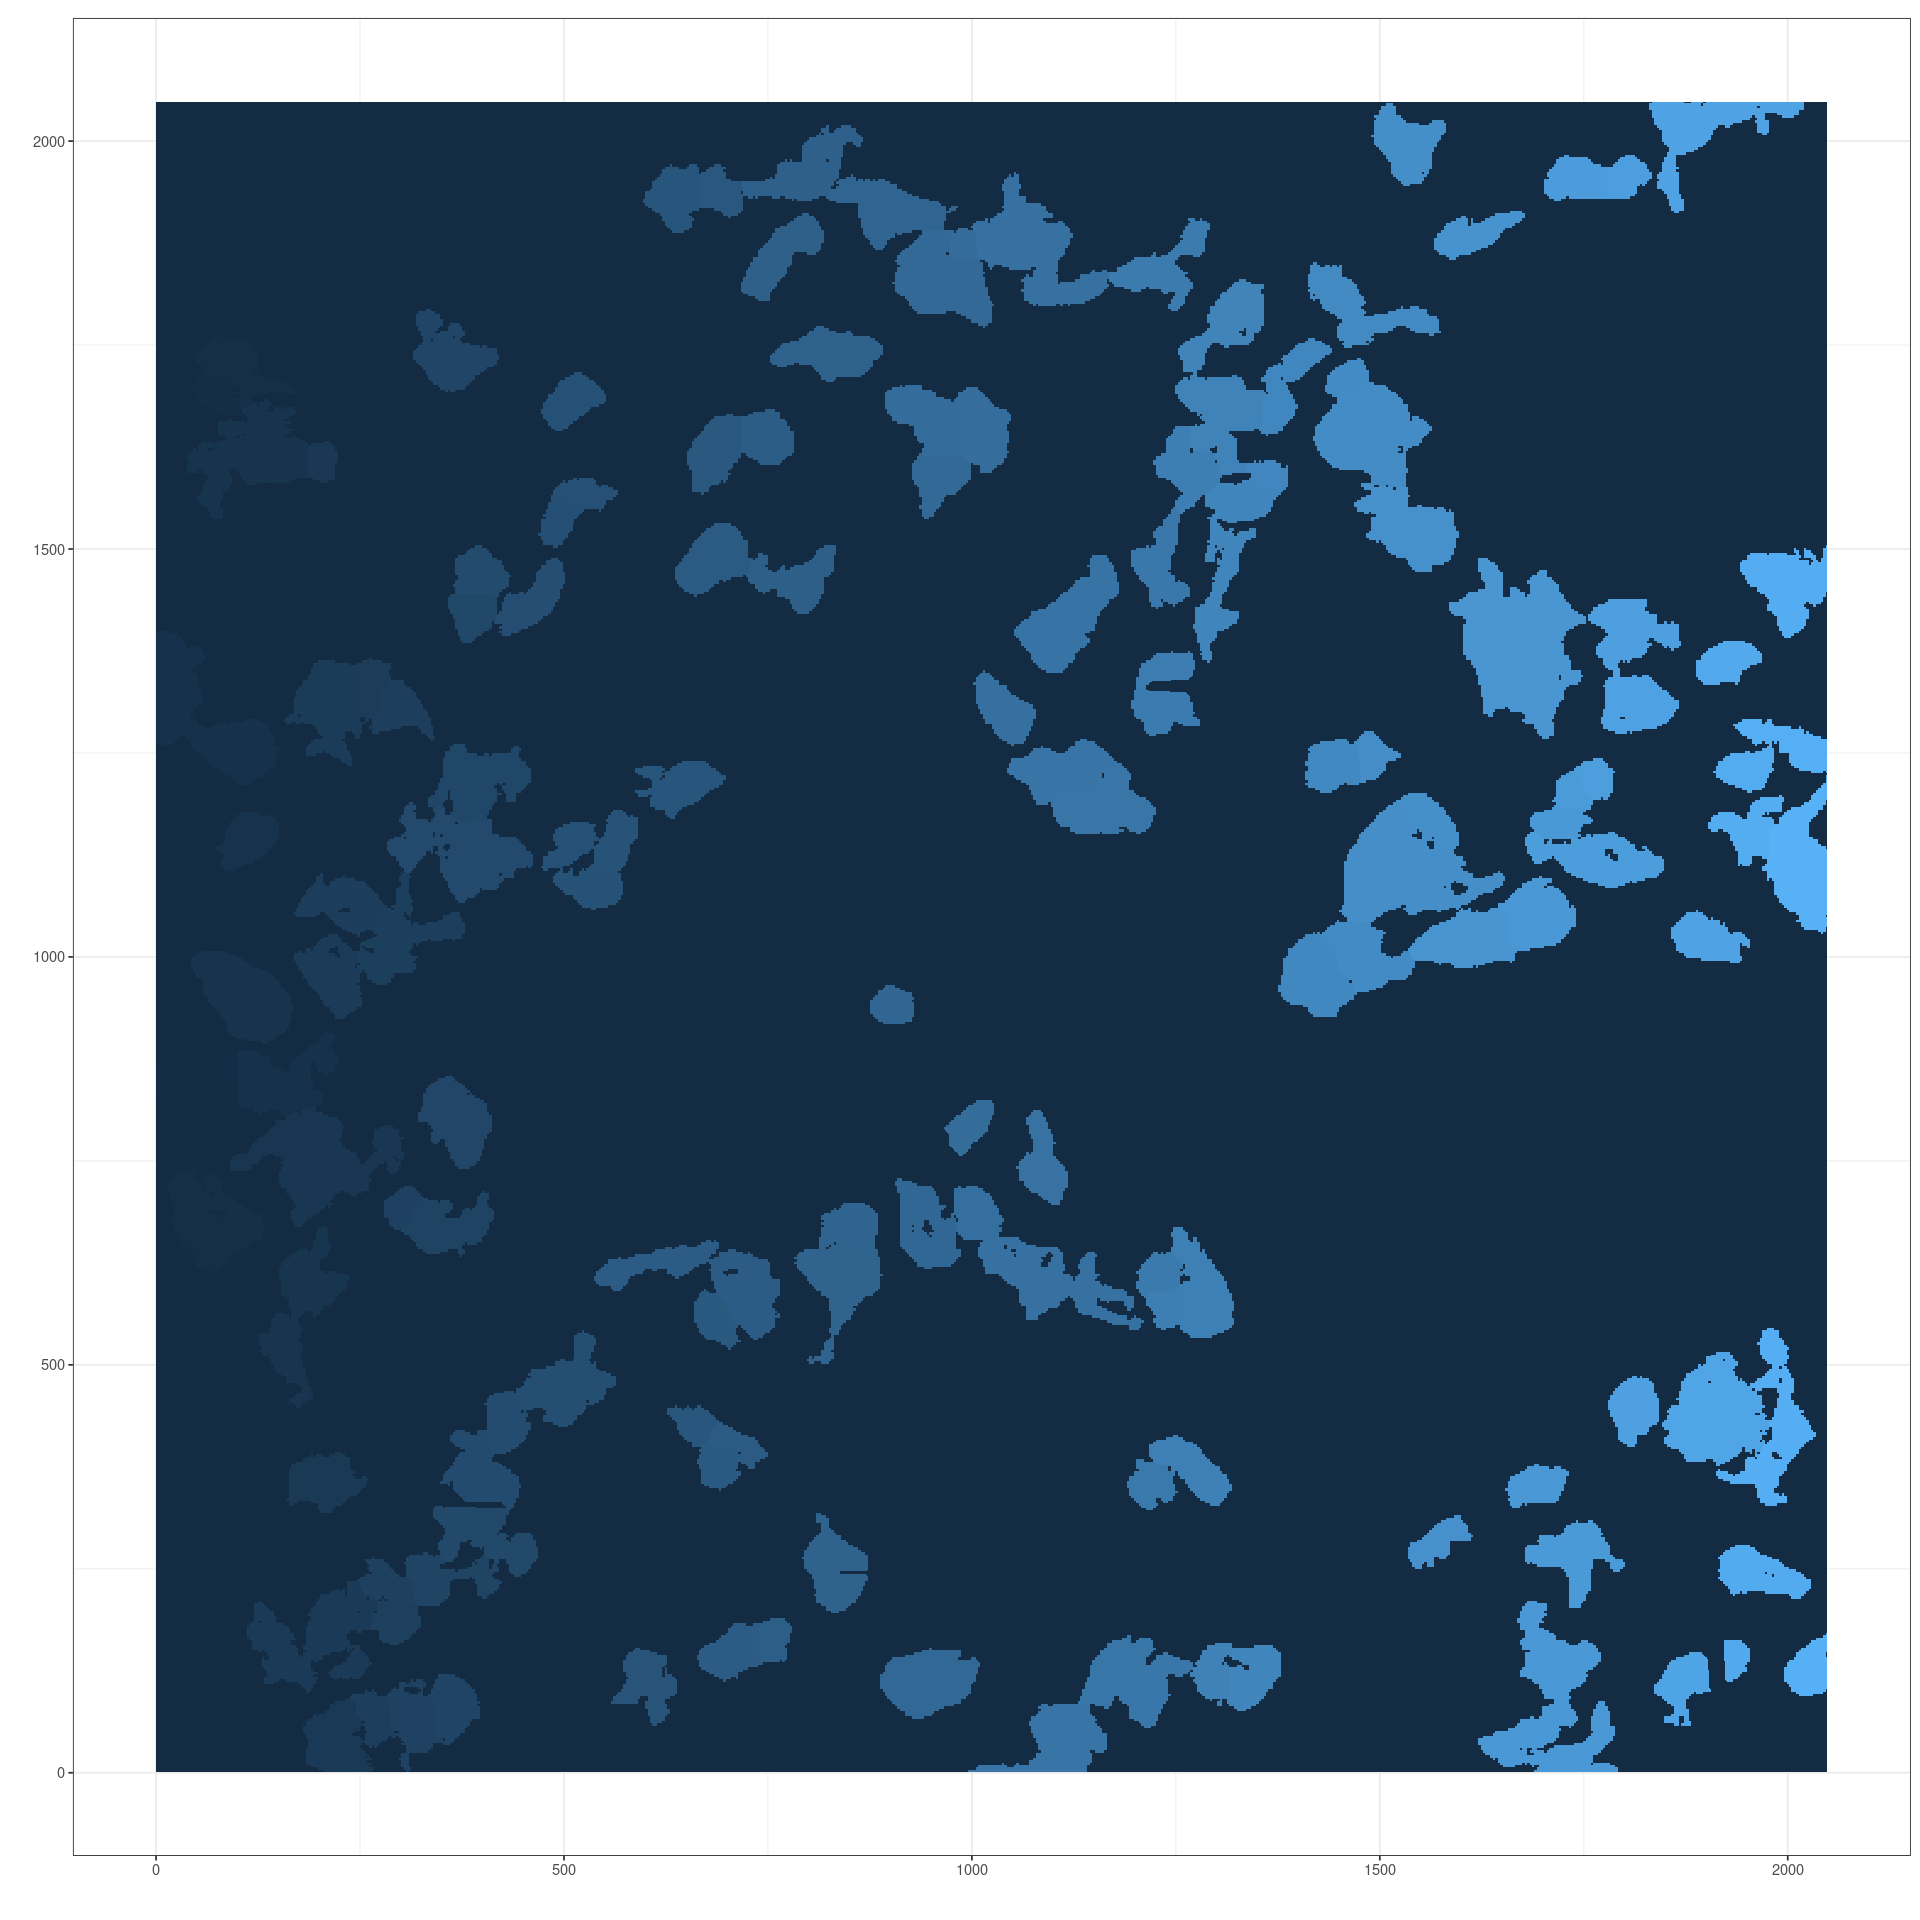

In [62]:
volumedt2 = copy(volumedt)
selected_nids = nfdata[size>1e3 & sid==1, nid]
volumedt2[!value %in% selected_nids, value := 0]

# Plot with ggplot
ggplot() +
    geom_tile(data=volumedt2, aes(x=col, y=row, fill=value)) +
    coord_fixed() + theme_bw() +
    guides(fill=F) + labs(x="", y="")